## Linear Regression

### Setup

In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### Dataset

In [3]:
np.random.seed(42)
n=100 #number of instances
X=2*np.random.rand(n,1)  
y=4 + 3*X + np.random.randn(n,1) #column vector #4+ 3x_1 + Gaussian noise 
#w_0 + w_1 x_1 _ Gaussian Noise

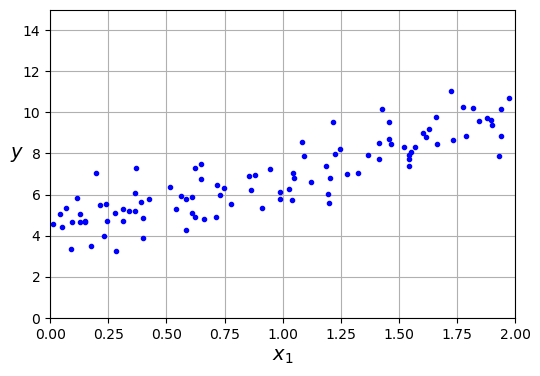

In [4]:
#plotting the data
plt.figure(figsize=(6, 4))

plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [5]:

# Add a column of ones to the beginning of the matrix
ones = np.ones((X.shape[0], 1))
X_b = np.hstack((ones, X))


## Least squares method

The minimization equation can be written in the vector form as,

\begin{equation*}\begin{split}\underset{w \in \mathbb{R}^d}{\min} & {||Xw - y||}^2 \\\underset{w \in \mathbb{R}^d}{\min} & (Xw - y)^T(Xw - y) \\\end{split}\end{equation*}

X here is a n x d matrix, where <b>n</b> is the number of samples and <b>d</b> is the number of features. <br>
<b>w</b> is a d*1 vector

Let's write it as a function of w and take the gradient inorder to find the minimum, 

\begin{equation*}\begin{split}f(w) &= (Xw - y)^T(Xw - y) \\\nabla f(w) &= 2 (X^TX)w - 2(X^Ty) \\(X^TX)w^* &= X^Ty \\w^* &= (X^TX)^\dagger(X^Ty)\end{split}\end{equation*}

where $(X^TX)^\dagger$ is the pseudo-inverse of $X^TX$

In [6]:
w=np.linalg.pinv(X_b.T@X_b)@(X_b.T@y)
print(w) 

[[4.21509616]
 [2.77011339]]


<b>4.215</b> corresponds to <b>w_0</b> & <b>2.77</b> corresponds <b>w_1</b> in the eqn <b>w_0 + w_1*x_1 + Gaussian_Noise</b> <br>
Close enough to w_0=4 and w_1=3

## Gradient Descent Method

Our Original Mean Squared Error function was, $\nabla f=2(X^TX)w-2(X^Ty)$ <br>
Now let's use this gradient in the gradient descent equation 


$$w^{t+1} = w^t - \eta_t [2(X^TX)w - 2X^Ty]$$
where 
η is a scalar used to control the step-size of the descent and 
𝑡
is the current iteration.

### Batch Gradient Descent

In [7]:
eta=0.1
n_epochs=1000
n=len(X_b)

np.random.seed(42)
w=np.random.randn(2,1) #randomly initialize parameters

for epoch in range(n_epochs):
    gradient=2/n*X_b.T@(X_b@w-y) # divide by number of samples in batch gradient descent
    w=w - eta*gradient
    

In [8]:
print(w)

[[4.21509616]
 [2.77011339]]


##### Exactly what the Normal Equation found! 

In [9]:
y_pred = X_b@w
y_pred.shape

(100, 1)

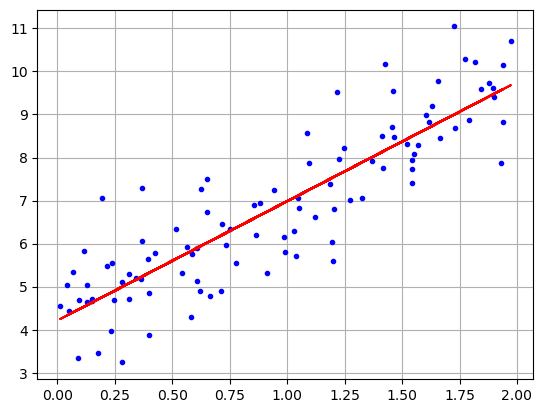

In [10]:
plt.plot(X,y,"b.")
plt.plot(X,y_pred,"r")
plt.grid()


### Stochastic Gradient Descent

In [27]:
n_epochs=60
t0,t1=5, 50 #learning schedule parameters
def learning_schedule(t):
    return t0/(t+t1)

np.random.seed(42)
w_sgd=np.random.randn(2,1)
n=len(X_b)
for epoch in range(n_epochs):
    for iteration in range(n):
        random_index=np.random.randint(n)
        x_i=X_b[random_index:random_index+1]
        y_i=y[random_index:random_index+1]
        gradients=2*x_i.T @(x_i@w_sgd - y_i) #for sgd, do not divide by n (number of instances)
        eta=learning_schedule(epoch*n+iteration)
        w_sgd=w_sgd-eta*gradients

        
        
    

In [28]:
print(w_sgd)

[[4.204295  ]
 [2.79489369]]


In [35]:
y_sgd_pred = X_b@w_sgd
y_sgd_pred.shape

(100, 1)

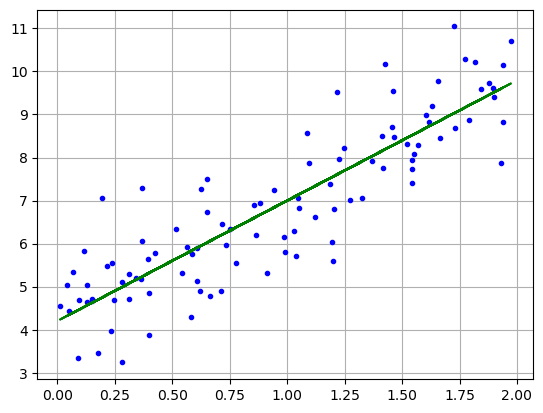

In [39]:
plt.plot(X,y,"b.")
plt.plot(X,y_sgd_pred,"g")
plt.grid()